### Name: Gowtham Paruchuri

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**

|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [14]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [385]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date,timedelta
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None

In [131]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [22]:
# Try loading one file

import os
print(os.getcwd())
df = pd.read_parquet('trip_records/2023-1.parquet')
df.info()

C:\Users\admin\NYC Taxi
<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  air

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [24]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df.sample(frac=0.05,random_state=42).head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
323412          1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1491266         2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2385670         2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
766545          2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
980153          1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   
188779          2  2023-01-03 16:17:30   2023-01-03 16:35:27              2.0   
205003          2  2023-01-03 19:52:03   2023-01-03 19:55:24              1.0   
1365351         2  2023-01-15 15:41:41   2023-01-15 15:54:03              1.0   
2279268         1  2023-01-24 21:55:51   2023-01-24 22:05:17              2.0   
2245866         2  2023-01-24 16:18:02   2023-01-24 16:25:33              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
323412            1.90         1.0                  N           239   
1491266           1.86         1.0                  N           239   
2385670           0.50         1.0                  N           162   
766545            2.56         1.0                  N           162   
980153            2.80         1.0                  N           164   
188779            2.69         1.0                  N           161   
205003            0.87         1.0                  N           151   
1365351           1.86         1.0                  N           211   
2279268           2.40         1.0                  N           164   
2245866           1.10         1.0                  N           234   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
323412            236             1         13.5    2.5      0.5        2.50   
1491266           162             1         14.2    0.0      0.5        3.64   
2385670           170             1          5.1    1.0      0.5        2.02   
766545            262             1         17.0    2.5      0.5        4.70   
980153            231             1         14.9    3.5      0.5        3.98   
188779            239             1         17.7    2.5      0.5        2.00   
205003            239             1          6.5    2.5      0.5        1.00   
1365351           234             1         13.5    0.0      0.5        3.50   
2279268           236             1         12.1    3.5      0.5        4.25   
2245866           164             2          8.6    2.5      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
323412            0.0                    1.0         20.00   
1491266           0.0                    1.0         21.84   
2385670           0.0                    1.0         12.12   
766545            0.0                    1.0         28.20   
980153            0.0                    1.0         23.88   
188779            0.0                    1.0         26.20   
205003            0.0                    1.0         14.00   
1365351           0.0                    1.0         21.00   
2279268           0.0                    1.0         21.35   
2245866           0.0                    1.0         15.10   

         congestion_surcharge  airport_fee  
323412                    2.5          0.0  
1491266                   2.5          0.0  
2385670                   2.5          0.0  
766545                    2.5          0.0  
980153                    2.5          0.0  
188779                    2.5          0.0  
205003                    2.5          0.0  
1365351                   2.5          0.0  
2279268                   2.5          0.0  
2245866                   2.5          0.0

In [26]:
# from google.colab import drive
# drive.mount('/content/drive')
os.listdir('trip_records')

['2023-1.parquet',
 '2023-10.parquet',
 '2023-11.parquet',
 '2023-12.parquet',
 '2023-2.parquet',
 '2023-3.parquet',
 '2023-4.parquet',
 '2023-5.parquet',
 '2023-6.parquet',
 '2023-7.parquet',
 '2023-8.parquet',
 '2023-9.parquet',
 '2023.parquet',
 '2023_temp.parquet']

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
#os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir('trip_records')

# initialise an empty dataframe
df = pd.DataFrame()
trips_per_year          = []
# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        trips_per_month = []
        # file path for the current file
        file_path       =   os.path.join(os.getcwd(),'trip_records', file_name)
        # Reading the current file
        print(file_path)
        taxi_trips      =   pd.read_parquet(file_path)
        

        taxi_trips['tpep_pickup_date']  = taxi_trips['tpep_pickup_datetime'].dt.date
        taxi_trips['tpep_pickup_year']  = taxi_trips['tpep_pickup_datetime'].dt.year
        taxi_trips['tpep_pickup_month'] = taxi_trips['tpep_pickup_datetime'].dt.month        
        taxi_trips['tpep_pickup_day']   = taxi_trips['tpep_pickup_datetime'].dt.day
        taxi_trips['tpep_pickup_hour']  = taxi_trips['tpep_pickup_datetime'].dt.hour
        taxi_trips['tpep_pickup_month_name'] = taxi_trips['tpep_pickup_datetime'].dt.strftime('%B')
        
        # filter year = 2023 records
        _2023_records   = taxi_trips[taxi_trips['tpep_pickup_year'] == 2023]

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        pickup_dates        = _2023_records.tpep_pickup_date.unique()     
        
        # Loop through dates and then loop through every hour of each date
        for pickup_date in pickup_dates:            
            # Iterate through each hour of the selected date   
            all_hrs_data    = []
            print(pickup_date)
            
            for hr in np.arange(0,24):    
                hourly_data         = _2023_records[ (_2023_records['tpep_pickup_date'] == pickup_date) & (_2023_records['tpep_pickup_hour'] == hr)].sort_values(by='tpep_pickup_datetime')                        
                # Sample 5% of the hourly data randomly
                hrly_sample_data    = hourly_data.sample(frac=0.05, random_state=42)                
                # add data of this hour to the dataframe
                all_hrs_data.append(hrly_sample_data)

            print(len(all_hrs_data))
            trips_per_day_df        = pd.concat(all_hrs_data)            
            trips_per_month.append(trips_per_day_df) ## 31 days

        print(len(trips_per_month))
        trips_per_month_df          = pd.concat(trips_per_month)
        trips_per_year.append(trips_per_month_df)
        
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Concatenate the sampled data of all the dates to a single dataframe
df  = pd.concat(trips_per_year)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
file_path       =   os.path.join(os.getcwd(),'trip_records', '2023.parquet')
df.to_parquet(file_path)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [1386]:
# Load the new data file
df = pd.read_parquet('trip_records/2023_temp.parquet')

In [1370]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3441         1  2023-01-01 00:51:45   2023-01-01 01:13:54             1.00   
2076         2  2023-01-01 00:45:56   2023-01-01 00:51:51             1.00   
223          2  2023-01-01 00:55:03   2023-01-01 01:00:09             1.00   
1823         1  2023-01-01 00:42:44   2023-01-01 00:53:41             2.00   
4869         2  2023-01-01 00:54:28   2023-01-01 01:09:04             3.00   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3441           4.40        1.00                  N           137   
2076           0.88        1.00                  N           236   
223            0.69        1.00                  N           142   
1823           2.90        1.00                  N            79   
4869           3.66        1.00                  N           231   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3441           226             1        21.90   3.50     0.50        5.40   
2076            43             1         7.20   1.00     0.50        1.94   
223            239             2         7.20   1.00     0.50        0.00   
1823           140             1        14.20   3.50     0.50        2.00   
4869            79             1        18.40   1.00     0.50        4.68   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
3441          0.00                   1.00         32.30                  2.50   
2076          0.00                   1.00         11.64                  0.00   
223           0.00                   1.00         12.20                  2.50   
1823          0.00                   1.00         21.20                  2.50   
4869          0.00                   1.00         28.08                  2.50   

      airport_fee tpep_pickup_date  tpep_pickup_year  tpep_pickup_month  \
3441         0.00       2023-01-01              2023                  1   
2076         0.00       2023-01-01              2023                  1   
223          0.00       2023-01-01              2023                  1   
1823         0.00       2023-01-01              2023                  1   
4869         0.00       2023-01-01              2023                  1   

      tpep_pickup_day  tpep_pickup_hour tpep_pickup_month_name  Airport_fee  
3441                1                 0                January          NaN  
2076                1                 0                January          NaN  
223                 1                 0                January          NaN  
1823                1                 0                January          NaN  
4869                1                 0                January          NaN

In [1388]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300050 entries, 3441 to 2597617
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   VendorID                300050 non-null  int64         
 1   tpep_pickup_datetime    300050 non-null  datetime64[us]
 2   tpep_dropoff_datetime   300050 non-null  datetime64[us]
 3   passenger_count         289698 non-null  float64       
 4   trip_distance           300050 non-null  float64       
 5   RatecodeID              289698 non-null  float64       
 6   store_and_fwd_flag      289698 non-null  object        
 7   PULocationID            300050 non-null  int64         
 8   DOLocationID            300050 non-null  int64         
 9   payment_type            300050 non-null  int64         
 10  fare_amount             300050 non-null  float64       
 11  extra                   300050 non-null  float64       
 12  mta_tax                 300050 

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [1374]:
# Fix the index and drop any columns that are not needed
df.isna().mean()*100

VendorID                  0.00
tpep_pickup_datetime      0.00
tpep_dropoff_datetime     0.00
passenger_count           3.45
trip_distance             0.00
RatecodeID                3.45
store_and_fwd_flag        3.45
PULocationID              0.00
DOLocationID              0.00
payment_type              0.00
fare_amount               0.00
extra                     0.00
mta_tax                   0.00
tip_amount                0.00
tolls_amount              0.00
improvement_surcharge     0.00
total_amount              0.00
congestion_surcharge      3.45
airport_fee              92.16
tpep_pickup_date          0.00
tpep_pickup_year          0.00
tpep_pickup_month         0.00
tpep_pickup_day           0.00
tpep_pickup_hour          0.00
tpep_pickup_month_name    0.00
Airport_fee              11.29
dtype: float64

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [1390]:
# Combine the two airport fee columns
def comb_2_fees(row):
    fee1 = row['Airport_fee']
    fee2 = row['airport_fee']
    
    if np.isnan(fee1) and np.isnan(fee2):
        return np.nan
    else:
        return np.nansum((fee1,fee2))
    
df['Airport_fee'] = df.apply(comb_2_fees,axis=1)

### drop the duplicate col after combining
df.drop('airport_fee',axis=1,inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [1391]:
# check where values of fare amount are negative
df[df.fare_amount < 0].shape

(0, 25)

In [1396]:
df[df['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2995299         2  2023-01-01 00:54:00   2023-01-01 01:27:00              NaN   
2995333         2  2023-01-01 00:42:18   2023-01-01 00:56:38              NaN   
2995429         2  2023-01-01 01:07:35   2023-01-01 01:15:34              NaN   
2995644         1  2023-01-01 01:04:01   2023-01-01 01:25:11              NaN   
2995935         1  2023-01-01 02:01:56   2023-01-01 02:15:42              NaN   
...           ...                  ...                   ...              ...   
2841270         1  2023-09-29 20:25:37   2023-09-29 20:35:39              NaN   
2841435         1  2023-09-29 21:02:20   2023-09-29 21:09:15              NaN   
2841529         1  2023-09-29 21:02:17   2023-09-29 21:16:38              NaN   
2841585         2  2023-09-29 22:39:53   2023-09-29 22:59:24              NaN   
2841627         2  2023-09-29 22:26:00   2023-09-29 22:55:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2995299           0.24         NaN               None           143   
2995333           4.67         NaN               None           261   
2995429           1.01         NaN               None           107   
2995644           0.00         NaN               None           163   
2995935           0.00         NaN               None           256   
...                ...         ...                ...           ...   
2841270           0.00         NaN               None           229   
2841435           0.00         NaN               None            87   
2841529           2.50         NaN               None           249   
2841585           3.37         NaN               None           234   
2841627           5.29         NaN               None           113   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2995299           148             0        36.44   0.00     0.50        8.09   
2995333           224             0        24.18   0.00     0.50        5.07   
2995429           164             0        13.00   0.00     0.50        1.00   
2995644           234             0        44.77   0.00     0.50        0.00   
2995935           148             0        11.00   1.00     0.50        0.00   
...               ...           ...          ...    ...      ...         ...   
2841270           236             0        11.82   0.00     0.50        0.00   
2841435           231             0        15.83   0.00     0.50        0.00   
2841529           162             0        14.90   1.00     0.50        2.99   
2841585           239             0        24.37   0.00     0.50        4.26   
2841627           181             0        29.84   0.00     0.50        1.00   

         tolls_amount  improvement_surcharge  total_amount  \
2995299          0.00                   1.00         48.53   
2995333          0.00                   1.00         33.25   
2995429          0.00                   1.00         18.00   
2995644          0.00                   1.00         48.77   
2995935          0.00                   1.00         18.00   
...               ...                    ...           ...   
2841270          0.00                   1.00         15.82   
2841435          0.00                   1.00         19.83   
2841529          0.00                   1.00         22.89   
2841585          0.00                   1.00         32.63   
2841627          0.00                   1.00         34.84   

         congestion_surcharge tpep_pickup_date  tpep_pickup_year  \
2995299                   NaN       2023-01-01              2023   
2995333                   NaN       2023-01-01              2023   
2995429                   NaN       2023-01-01              2023   
2995644                   NaN       2023-01-01              2023   
2995935                   NaN       2023-01-01              2023   
...                       ...              ...               ...   
2

In [1398]:
df[(df['passenger_count'].isnull())&(df['RatecodeID'].isnull())]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2995299         2  2023-01-01 00:54:00   2023-01-01 01:27:00              NaN   
2995333         2  2023-01-01 00:42:18   2023-01-01 00:56:38              NaN   
2995429         2  2023-01-01 01:07:35   2023-01-01 01:15:34              NaN   
2995644         1  2023-01-01 01:04:01   2023-01-01 01:25:11              NaN   
2995935         1  2023-01-01 02:01:56   2023-01-01 02:15:42              NaN   
...           ...                  ...                   ...              ...   
2841270         1  2023-09-29 20:25:37   2023-09-29 20:35:39              NaN   
2841435         1  2023-09-29 21:02:20   2023-09-29 21:09:15              NaN   
2841529         1  2023-09-29 21:02:17   2023-09-29 21:16:38              NaN   
2841585         2  2023-09-29 22:39:53   2023-09-29 22:59:24              NaN   
2841627         2  2023-09-29 22:26:00   2023-09-29 22:55:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2995299           0.24         NaN               None           143   
2995333           4.67         NaN               None           261   
2995429           1.01         NaN               None           107   
2995644           0.00         NaN               None           163   
2995935           0.00         NaN               None           256   
...                ...         ...                ...           ...   
2841270           0.00         NaN               None           229   
2841435           0.00         NaN               None            87   
2841529           2.50         NaN               None           249   
2841585           3.37         NaN               None           234   
2841627           5.29         NaN               None           113   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2995299           148             0        36.44   0.00     0.50        8.09   
2995333           224             0        24.18   0.00     0.50        5.07   
2995429           164             0        13.00   0.00     0.50        1.00   
2995644           234             0        44.77   0.00     0.50        0.00   
2995935           148             0        11.00   1.00     0.50        0.00   
...               ...           ...          ...    ...      ...         ...   
2841270           236             0        11.82   0.00     0.50        0.00   
2841435           231             0        15.83   0.00     0.50        0.00   
2841529           162             0        14.90   1.00     0.50        2.99   
2841585           239             0        24.37   0.00     0.50        4.26   
2841627           181             0        29.84   0.00     0.50        1.00   

         tolls_amount  improvement_surcharge  total_amount  \
2995299          0.00                   1.00         48.53   
2995333          0.00                   1.00         33.25   
2995429          0.00                   1.00         18.00   
2995644          0.00                   1.00         48.77   
2995935          0.00                   1.00         18.00   
...               ...                    ...           ...   
2841270          0.00                   1.00         15.82   
2841435          0.00                   1.00         19.83   
2841529          0.00                   1.00         22.89   
2841585          0.00                   1.00         32.63   
2841627          0.00                   1.00         34.84   

         congestion_surcharge tpep_pickup_date  tpep_pickup_year  \
2995299                   NaN       2023-01-01              2023   
2995333                   NaN       2023-01-01              2023   
2995429                   NaN       2023-01-01              2023   
2995644                   NaN       2023-01-01              2023   
2995935                   NaN       2023-01-01              2023   
...                       ...              ...               ...   
2

Did you notice something different in the `RatecodeID` column for above records?

In [1400]:
# Analyse RatecodeID for the negative fare amounts
df[df.fare_amount < 0]['RatecodeID']

Series([], Name: RatecodeID, dtype: float64)

##### Observation: there are no records with negative fare amounts however, there are some invalid rate code ids which are NOT part of data dictionary

In [547]:
### Analyse the RateCodeID as per data dictionary - look for valid records
df[df['RatecodeID']>6][['RatecodeID','passenger_count']].value_counts()

RatecodeID  passenger_count
99.00       1.00               1651
            0.00                  3
            2.00                  1
Name: count, dtype: int64

##### observation: many invalid record ids ? perhaps, taxi not connected to server & these records are manually fed?

In [549]:
### check the store and forward flag to confirm taxi is not connected to server.
df[df['RatecodeID']==99][['RatecodeID','passenger_count','store_and_fwd_flag']].value_counts()


RatecodeID  passenger_count  store_and_fwd_flag
99.00       1.00             N                     1651
            0.00             N                        2
                             Y                        1
            2.00             N                        1
Name: count, dtype: int64

##### observation: perhaps these 1650+ records need a treatment i.e.., to impute RatecodeID with 1 as passanger count is 1 for most of the case.

In [1411]:
# Find out all columns which have negative values
num_cols = df.select_dtypes(include='number')

neg_cols = []
for num_col in num_cols:
    non_zero = df[df[num_col] < 0].shape[0]
    if non_zero:
        neg_cols.append(num_col)

neg_cols


['mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

##### Observation: not sure if amounts & tax fields can have a negative so, need to find out the percentage of the data & delete from the data set to avoid noise

In [1415]:
# fix these negative values
for col in neg_cols:    
    neg_r = df[df[col]<0].shape[0]
    total = df[col].shape[0]       
    print(col,' : ',100*neg_r/total)

### percentage of negative rows are very less so, dropping those rows from the data set
df = df[df['total_amount']>=0]

mta_tax  :  0.004665889018496917
improvement_surcharge  :  0.004665889018496917
total_amount  :  0.004665889018496917
congestion_surcharge  :  0.004332611231461423
Airport_fee  :  0.0006665555740709882


In [1417]:
df.shape

(300036, 25)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [1419]:
# Find the proportion of missing values in each column
df.isna().mean()*100

VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          3.45
trip_distance            0.00
RatecodeID               3.45
store_and_fwd_flag       3.45
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     3.45
tpep_pickup_date         0.00
tpep_pickup_year         0.00
tpep_pickup_month        0.00
tpep_pickup_day          0.00
tpep_pickup_hour         0.00
tpep_pickup_month_name   0.00
Airport_fee              3.45
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [559]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df['passenger_count'].isnull()]

df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df.isna().mean()*100

VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          0.00
trip_distance            0.00
RatecodeID               3.45
store_and_fwd_flag       3.45
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     3.45
tpep_pickup_date         0.00
tpep_pickup_year         0.00
tpep_pickup_month        0.00
tpep_pickup_day          0.00
tpep_pickup_hour         0.00
tpep_pickup_month_name   0.00
Airport_fee              3.45
dtype: float64

In [1421]:
df[df['passenger_count'] == 0].shape[0]

4692

Did you find zeroes in passenger_count? Handle these.

######
###### There are around 4500+ zero passenger records. 

###### Reason could be:
             - TAXI not conneted to server 
             - Not a passenger TAXI but load taxi ? - check trip duration, fare amount.
             - Taxi gone for a pick up ride ? like to airport ? Check Point : trip duration & fare amount.
             - drop records if 0 passenger 0 fare amount 0 trip duration.

###### For more information:              
     - Find out the fare amount per distance
     - find out trip duration to see if taxi is idle.
     - Observe the passenger count & rate cade IDs 
    

In [1423]:

df['fare_amount_per_dist'] = df['fare_amount']// df['trip_distance'] 
df['tpep_trip_duration']   = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.seconds/60

cols = df.columns.tolist()
cols.insert(3, cols.pop(cols.index('tpep_trip_duration')))
df = df[cols]

In [1425]:
df[(df['fare_amount_per_dist']==np.inf) & (df['passenger_count'] ==0 ) & (df['tpep_trip_duration'] ==0) ]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
1603440         1  2023-01-18 10:06:36   2023-01-18 10:06:36   
2915808         1  2023-10-27 18:03:59   2023-10-27 18:03:59   
1900766         1  2023-11-17 16:41:23   2023-11-17 16:41:23   
3172455         1  2023-11-30 19:10:29   2023-11-30 19:10:29   
3351542         1  2023-05-31 15:52:16   2023-05-31 15:52:16   
1736671         1  2023-05-16 14:33:31   2023-05-16 14:33:31   

         tpep_trip_duration  passenger_count  trip_distance  RatecodeID  \
1603440                0.00             0.00           0.00        1.00   
2915808                0.00             0.00           0.00        3.00   
1900766                0.00             0.00           0.00       99.00   
3172455                0.00             0.00           0.00       99.00   
3351542                0.00             0.00           0.00       99.00   
1736671                0.00             0.00           0.00        1.00   

        store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
1603440                  Y           229           264             2   
2915808                  Y           129           264             2   
1900766                  N           264           264             1   
3172455                  Y           138           264             1   
3351542                  N           264           264             1   
1736671                  N           237           264             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
1603440        17.00   2.50     0.50        0.00          0.00   
2915808        23.70   2.50     0.00        0.00          0.00   
1900766        74.00   0.00     0.00       14.80          0.00   
3172455        68.51   0.00     0.00        0.00          0.00   
3351542        27.30   0.00     0.00        5.00          0.00   
1736671        10.00   2.50     0.50        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
1603440                   1.00         21.00                  2.50   
2915808                   1.00         27.20                  0.00   
1900766                   0.00         88.80                  0.00   
3172455                   0.00         68.51                  0.00   
3351542                   0.00         32.30                  0.00   
1736671                   1.00         14.00                  2.50   

        tpep_pickup_date  tpep_pickup_year  tpep_pickup_month  \
1603440       2023-01-18              2023                  1   
2915808       2023-10-27              2023                 10   
1900766       2023-11-17              2023                 11   
3172455       2023-11-30              2023                 11   
3351542       2023-05-31              2023                  5   
1736671       2023-05-16              2023                  5   

         tpep_pickup_day  tpep_pickup_hour tpep_pickup_month_name  \
1603440               18                10                January   
2915808               27                18                October   
1900766               17                16               November   
3172455               30                19               November   
3351542               31                15                    May   
1736671               16                14                    May   

         Airport_fee  fare_amount_per_dist  
1603440         0.00                   inf  
2915808         0.00                   inf  
1900766         0.00                   inf  
3172455         0.00                   inf  
3351542         0.00                   inf  
1736671         0.00                   inf

In [1427]:
df[df['RatecodeID'] > 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
33758           1  2023-01-01 12:30:31   2023-01-01 12:44:08   
37541           1  2023-01-01 13:57:00   2023-01-01 14:19:32   
50181           1  2023-01-01 16:11:04   2023-01-01 16:17:06   
78376           1  2023-01-02 07:32:25   2023-01-02 07:49:15   
92917           1  2023-01-02 12:15:42   2023-01-02 13:02:12   
...           ...                  ...                   ...   
2395768         1  2023-09-28 08:01:08   2023-09-28 08:43:50   
2438999         1  2023-09-28 15:30:45   2023-09-28 16:16:27   
2466246         1  2023-09-28 18:04:25   2023-09-28 18:20:50   
2533544         1  2023-09-29 11:53:10   2023-09-29 12:12:06   
2540575         1  2023-09-29 13:49:37   2023-09-29 14:51:23   

         tpep_trip_duration  passenger_count  trip_distance  RatecodeID  \
33758                 13.62             1.00           0.00       99.00   
37541                 22.53             1.00           2.90       99.00   
50181                  6.03             1.00           0.60       99.00   
78376                 16.83             1.00           2.20       99.00   
92917                 46.50             1.00           8.50       99.00   
...                     ...              ...            ...         ...   
2395768               42.70             1.00           0.80       99.00   
2438999               45.70             1.00           4.20       99.00   
2466246               16.42             1.00           2.30       99.00   
2533544               18.93             1.00           0.60       99.00   
2540575               61.77             1.00           6.70       99.00   

        store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
33758                    N           213           247             1   
37541                    N           147           185             1   
50181                    N            90            68             1   
78376                    N           183           242             1   
92917                    N            69            51             1   
...                    ...           ...           ...           ...   
2395768                  N            78            94             1   
2438999                  N           225            85             1   
2466246                  N           197           135             1   
2533544                  N           196            56             1   
2540575                  N            56           137             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
33758          26.50   0.00     0.50        0.00          0.00   
37541          22.50   0.00     0.50        0.00          0.00   
50181          15.20   0.00     0.50        0.00          0.00   
78376          17.50   0.00     0.50        0.00          0.00   
92917          34.50   0.00     0.50        0.00          0.00   
...              ...    ...      ...         ...           ...   
2395768        16.50   0.00     0.50        0.00          0.00   
2438999        22.50   0.00     0.50        0.00          0.00   
2466246         0.00   0.00     0.00        0.00          0.00   
2533544        15.50   0.00     0.50        0.00          0.00   
2540575        29.50   0.00     0.50        0.00          6.94   

         improvement_surcharge  total_amount  congestion_surcharge  \
33758                     1.00         28.00                  0.00   
37541                     1.00         24.00                  0.00   
50181                     1.00         16.70                  0.00   
78376                     1.00         19.00                  0.00   
92917                     1.00         36.00                  0.00   
...                        ...           ...                   ...   
2395768                   1.00         18.00                  0.00   
2438999                   1.00         24.00                  0.00   
2466246                   0.00          0.00       

##### Observation: so,there are around 1600 records which have invalid ratecodeID - since these are NOT really missing but outliers - will handle them in outliers

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [1431]:
# Fix missing values in 'RatecodeID'
print(df['RatecodeID'].isnull().mean()*100)
df[df['RatecodeID'].isnull()]

med = df['RatecodeID'].median()
df['RatecodeID'] = df['RatecodeID'].fillna(med)
print(df['RatecodeID'].isnull().mean()*100)

0.0

##### Observation: Imputed all the missing rate code IDs with median.

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [1435]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isnull().mean()*100
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())
df['congestion_surcharge'].isnull().mean()*100

0.0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [1437]:
# Handle any remaining missing values
num_cols = df.select_dtypes(include='number')

### find out null from all numerical cols
missing_val_cols = []
for num_col in num_cols:
    non_zero = df[df[num_col].isnull()].shape[0]
    if non_zero:
        missing_val_cols.append(num_col)

### Impute them with median
for col in missing_val_cols:
    med = df[col].median()
    df[col] = df[col].fillna(med) 

### find out null from all categorical cols
cat_cols = df.columns
missing_cat_cols = []
for cat_col in cat_cols:
    non_zero = df[df[cat_col].isnull()].shape[0]
    if non_zero:
        missing_cat_cols.append(cat_col)

print(missing_cat_cols)
### Impute them with mode
for col in missing_cat_cols:
    md = df[col].mode()[0]
    df[col] = df[col].fillna(md) 


['store_and_fwd_flag']


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [1439]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count 300036.00                      300036                      300036   
mean       1.74  2023-07-02 19:54:58.304100  2023-07-02 20:12:26.400612   
min        1.00         2023-01-01 00:02:20         2023-01-01 00:07:36   
25%        1.00  2023-04-02 16:23:05.250000  2023-04-02 16:41:59.500000   
50%        2.00         2023-06-27 15:26:41  2023-06-27 15:52:51.500000   
75%        2.00  2023-10-06 19:28:55.500000  2023-10-06 19:45:29.250000   
max        6.00         2023-12-31 23:49:02         2024-01-01 12:27:24   
std        0.45                         NaN                         NaN   

       tpep_trip_duration  passenger_count  trip_distance  RatecodeID  \
count           300036.00        300036.00      300036.00   300036.00   
mean                17.57             1.36           3.76        1.61   
min                  0.00             0.00           0.00        1.00   
25%                  7.70             1.00           1.05        1.00   
50%                 12.72             1.00           1.80        1.00   
75%                 20.75             1.00           3.43        1.00   
max               1439.90             8.00       44192.26       99.00   
std                 41.19             0.88          93.18        7.26   

       PULocationID  DOLocationID  payment_type  fare_amount     extra  \
count     300036.00     300036.00     300036.00    300036.00 300036.00   
mean         165.20        164.03          1.16        19.96      1.58   
min            1.00          1.00          0.00         0.00      0.00   
25%          132.00        114.00          1.00         9.30      0.00   
50%          162.00        162.00          1.00        13.50      1.00   
75%          234.00        234.00          1.00        22.60      2.50   
max          265.00        265.00          4.00       606.40     12.11   
std           63.99         69.83          0.51        18.24      1.83   

        mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
count 300036.00   300036.00     300036.00              300036.00   
mean       0.50        3.56          0.61                   1.00   
min        0.00        0.00          0.00                   0.00   
25%        0.50        1.00          0.00                   1.00   
50%        0.50        2.85          0.00                   1.00   
75%        0.50        4.45          0.00                   1.00   
max       10.05      180.00        100.00                   1.00   
std        0.05        4.07          2.21                   0.03   

       total_amount  congestion_surcharge  tpep_pickup_year  \
count     300036.00             300036.00         300036.00   
mean          29.05                  2.32           2023.00   
min            0.00                  0.00           2023.00   
25%           16.00                  2.50           2023.00   
50%           21.20                  2.50           2023.00   
75%           31.05                  2.50           2023.00   
max          614.65                  2.50           2023.00   
std           22.83                  0.65              0.00   

       tpep_pickup_month  tpep_pickup_day  tpep_pickup_hour  Airport_fee  \
count          300036.00        300036.00         300036.00    300036.00   
mean                6.54            15.52             14.26         0.14   
min                 1.00             1.00              0.00         0.00   
25%                 4.00             8.00             11.00         0.00   
50%                 6.00            15.00             15.00         0.00   
75%                10.00            23.00             19.00         0.00   
max                12.00            31.00             23.00         1.75   
std                 3.47             8.70              5.81         0.46   

       fare_amount_per_dist  
count             300036.00  
mean                    inf  
min                    0.00  
25%                 

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [1445]:
# remove passenger_count > 6
df = df[~(df['passenger_count'] > 6) ]

In [589]:
# Continue with outlier handling

def p75(trip_dist):
    return np.quantile(trip_dist,0.75)

def p90(trip_dist):
    return np.quantile(trip_dist,0.90)

def p99(trip_dist):
    return np.quantile(trip_dist,0.99)
    
df[(np.isclose(df['trip_distance'],0,0.5))].groupby(['tpep_pickup_month_name'])['fare_amount'].aggregate(['min','median',p75,p90,p99,'max']).reset_index()



tpep_pickup_month_name  min  median   p75   p90    p99    max
0                   April 0.00   14.95 43.62 70.00 128.56 175.00
1                  August 0.00   15.64 28.94 70.00 141.53 312.00
2                December 0.00   18.16 35.56 70.00 167.99 280.00
3                February 0.00   11.20 25.10 70.00  97.70 130.00
4                 January 0.00   13.85 30.00 70.00 146.64 307.00
5                    July 0.00   16.70 37.00 72.00 191.40 230.00
6                    June 0.00   15.20 41.50 70.00 192.00 400.00
7                   March 0.00   14.19 31.12 70.00 142.10 200.00
8                     May 0.00   14.00 35.50 70.00 100.00 123.59
9                November 0.00   17.25 27.83 57.00  97.00 240.00
10                October 0.00   17.70 27.37 46.46 100.00 279.00
11              September 0.00   18.98 29.13 50.00 118.68 175.00

In [1451]:
### Entries where trip_distance is nearly 0 and fare_amount is more than 300

q1  = df['fare_amount'].describe()['25%']
q3  = df['fare_amount'].describe()['75%']
iqr = q3-q1 #take out inter quartile range (IQR)

lower_whisker  = q1-(1.5*iqr) #Lower bound
higher_whisker = q3+(1.5*iqr) #Higher bo

### Observation :  impute the fare amount when trip distance is 0 but fare is high
q3_cond           = ( np.isclose(df['trip_distance'],0, 0.5)) & (df['fare_amount'] > higher_whisker)
df['fare_amount'] = np.where(q3_cond, higher_whisker, df['fare_amount'])

df[(np.isclose(df['trip_distance'],0,0.5))].groupby(['tpep_pickup_month_name'])['fare_amount'].aggregate(['min','median',p75,p90,p99,'max']).reset_index()



tpep_pickup_month_name  min  median   p75   p90   p99   max
0                   April 0.00   14.95 42.55 42.55 42.55 42.55
1                  August 0.00   15.64 28.94 42.55 42.55 42.55
2                December 0.00   18.16 35.56 42.55 42.55 42.55
3                February 0.00   11.20 25.10 42.55 42.55 42.55
4                 January 0.00   13.85 30.00 42.55 42.55 42.55
5                    July 0.00   16.70 37.00 42.55 42.55 42.55
6                    June 0.00   15.20 41.50 42.55 42.55 42.55
7                   March 0.00   14.19 31.12 42.55 42.55 42.55
8                     May 0.00   14.00 35.50 42.55 42.55 42.55
9                November 0.00   17.25 27.83 42.55 42.55 42.55
10                October 0.00   17.70 27.37 42.55 42.55 42.55
11              September 0.00   18.98 29.13 42.55 42.55 42.55

In [1453]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)

cond = (df['PULocationID'] != df['DOLocationID']) & (np.isclose(df['trip_distance'],0,atol=0.5)) & (np.isclose(df['fare_amount'],0, atol=0.5))
print('Invalid records based on trip & distance & fare amount so, need to drop off these records')
print(df[cond])
## looks like invalid records - so, drop off 
df = df[~cond]


Invalid records based on trip & distance & fare amount so, need to drop off these records
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
858445          1  2023-01-10 19:28:41   2023-01-10 20:14:48   
769755          1  2023-10-08 04:35:51   2023-10-08 04:35:51   
1469478         1  2023-03-14 18:17:26   2023-03-14 18:17:26   
2168547         1  2023-06-21 00:16:18   2023-06-21 00:16:18   
2414469         1  2023-06-23 08:07:01   2023-06-23 08:07:01   
2520982         1  2023-06-24 02:38:43   2023-06-24 02:44:42   
649460          1  2023-08-08 09:44:40   2023-08-08 09:45:44   
1896263         1  2023-08-22 12:40:44   2023-08-22 12:40:44   
2729            1  2023-02-01 04:17:22   2023-02-01 04:17:22   
1786817         1  2023-02-18 13:07:30   2023-02-18 13:07:30   
1833081         1  2023-02-18 20:59:22   2023-02-18 20:59:22   
721529          2  2023-04-07 21:09:52   2023-04-07 21:10:01   
776380          1  2023-04-08 14:03:15   2023-04-08 14:06:47   
2134865       

In [1455]:
### Entries where trip_distance is more than 250 miles.
df[df['trip_distance'] > 250 ]

df = df[~(df['trip_distance'] > 250) ]

##### trip more than 250 but fare amount & duration are NOT in sync : so observation is to drop off records 


In [642]:
### Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

df['payment_type'] = np.where(df['payment_type']==0, 1, df['payment_type'])

##### Upon observation, payment type == 0, most of the records have passenger count is 1 so, impute payment type is 1


In [1459]:
# Do any columns need standardising?
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'tpep_trip_duration', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'tpep_pickup_date', 'tpep_pickup_year', 'tpep_pickup_month',
       'tpep_pickup_day', 'tpep_pickup_hour', 'tpep_pickup_month_name',
       'Airport_fee', 'fare_amount_per_dist'],
      dtype='object')

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

#### Observation: not all number fields are numerical fields like IDs 

#### first group of columns above like Vendor ID to trip duration are categorical
#### all the amounts are numerical numbers.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [762]:
# Find and show the hourly trends in taxi pickups

hrly_trend = df.groupby('tpep_pickup_hour')['tpep_pickup_datetime'].count().reset_index()
hrly_trend.rename(columns={'tpep_pickup_hour':'PickUp Hr','tpep_pickup_datetime':'Ride Count'},inplace=True)
hrly_trend

PickUp Hr  Ride Count
0           0        8483
1           1        5700
2           2        3763
3           3        2487
4           4        1678
5           5        1761
6           6        4173
7           7        8197
8           8       11360
9           9       12802
10         10       13916
11         11       15102
12         12       16392
13         13       16895
14         14       18109
15         15       18582
16         16       18591
17         17       20222
18         18       21184
19         19       18927
20         20       16866
21         21       16842
22         22       15611
23         23       12364

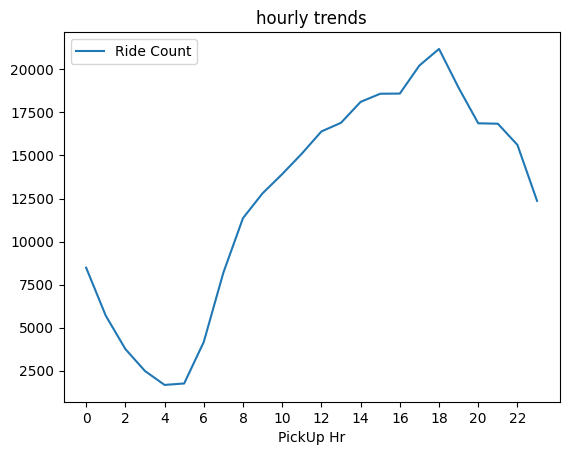

In [778]:
hrly_trend.plot.line(x='PickUp Hr',y='Ride Count')
plt.title('hourly trends')
plt.xticks(np.arange(0,24,2))
plt.show()

In [1493]:
df['tpep_pickup_day_nm'] = df['tpep_pickup_datetime'].dt.day_name()
daily_trend = df.groupby(['tpep_pickup_day_nm'])['tpep_pickup_datetime'].count().reset_index()
daily_trend.rename(columns={'tpep_pickup_day_nm':'WeekName','tpep_pickup_datetime':'Ride Count'},inplace=True)
daily_trend

WeekName  Ride Count
0     Friday       44646
1     Monday       37375
2   Saturday       43694
3     Sunday       37891
4   Thursday       47042
5    Tuesday       43394
6  Wednesday       45965

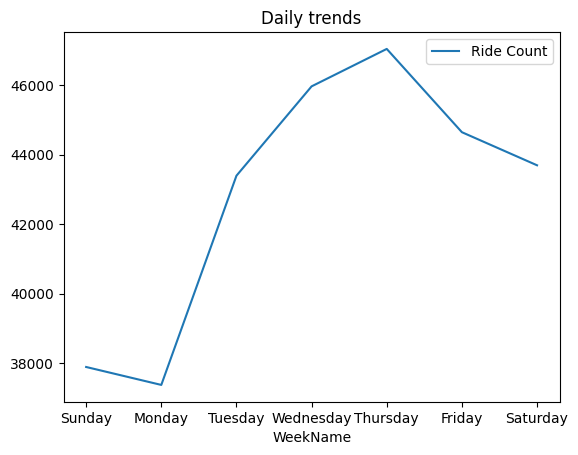

In [1495]:
# Find and show the daily trends in taxi pickups (days of the week)
week_nm_map = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':0}
daily_trend['WeekNum'] = daily_trend['WeekName'].map(week_nm_map)
daily_trend.sort_values('WeekNum').plot.line(x='WeekName',y='Ride Count')
plt.title('Daily trends')
plt.show()



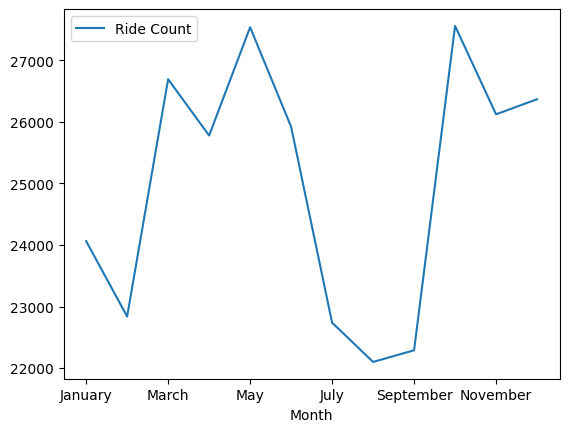

In [1497]:
# Show the monthly trends in pickups
import calendar
month_nm_map = {month: index for index, month in enumerate(calendar.month_name)}

monthly_trends = df.groupby(['tpep_pickup_month_name'])['tpep_pickup_datetime'].count().reset_index()
monthly_trends.rename(columns={'tpep_pickup_month_name':'Month','tpep_pickup_datetime':'Ride Count'},inplace=True)
monthly_trends['MonthNum'] = monthly_trends['Month'].map(month_nm_map)
monthly_trends.sort_values('MonthNum').drop('MonthNum',axis=1).plot.line(x='Month',y='Ride Count')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [1507]:
# Analyse the above parameters
print(df[df['fare_amount'] ==0]['fare_amount'].count())
print(df[df['tip_amount'] ==0]['tip_amount'].count())
print(df[df['total_amount'] ==0]['total_amount'].count())
print(df[df['trip_distance'] ==0]['trip_distance'].count())



66
68843
33
5775


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [1561]:
# Create a df with non zero entries for the selected parameters.
df2 = df[~(df['total_amount'] ==0)]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

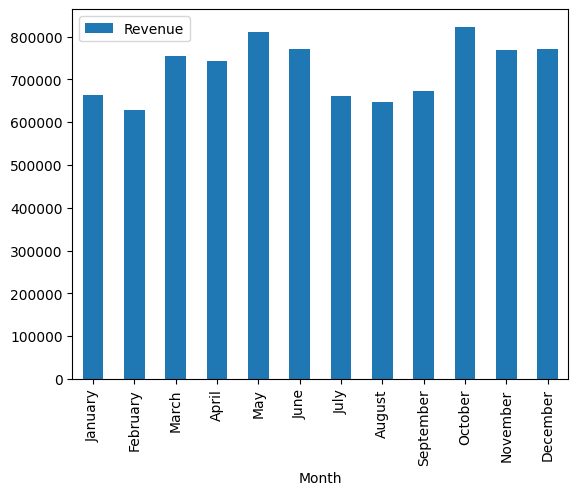

In [1563]:
# Group data by month and analyse monthly revenue
monthly_rev = df2.groupby('tpep_pickup_month_name')['total_amount'].sum().reset_index()
monthly_rev.rename(columns={'tpep_pickup_month_name':'Month','total_amount':'Revenue'},inplace=True)
monthly_rev['MonthNum'] = monthly_trends['Month'].map(month_nm_map)
monthly_rev.sort_values(['MonthNum']).plot.bar(x='Month',y='Revenue')
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

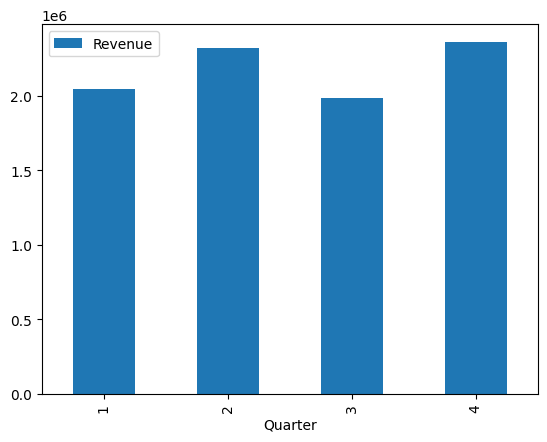

In [1567]:
# Calculate proportion of each quarter
df2['Quarter'] =  df2['tpep_pickup_datetime'].dt.quarter
quarterly_rev = df2.groupby('Quarter')['total_amount'].sum().reset_index()
quarterly_rev.rename(columns={'total_amount':'Revenue'},inplace=True)
quarterly_rev.plot.bar(x='Quarter',y='Revenue')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [1569]:
### correlation
df2[df2['trip_distance'] !=0]['trip_distance'].corr(df2['fare_amount'])

0.8689811676812474

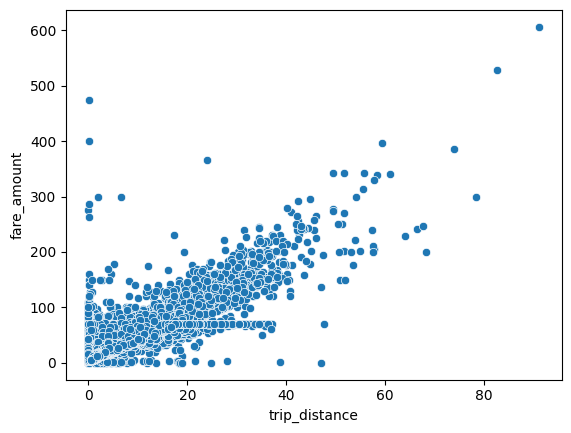

In [1571]:
# Show how trip fare is affected by distance

sns.scatterplot(df2[['trip_distance','fare_amount']],x='trip_distance',y='fare_amount')
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

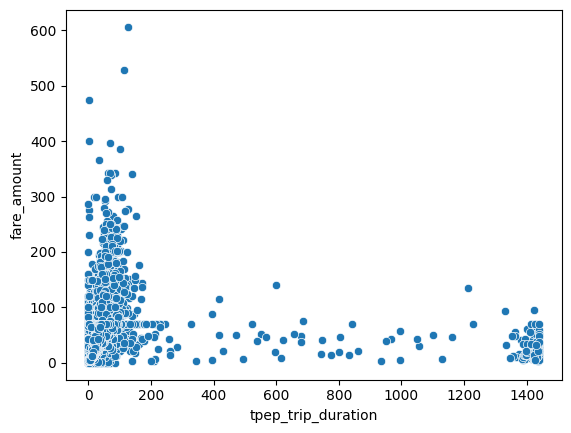

In [1573]:
# Show relationship between fare and trip duration
### correlation
sns.scatterplot(df2[['tpep_trip_duration','fare_amount']],x='tpep_trip_duration',y='fare_amount')
plt.show()

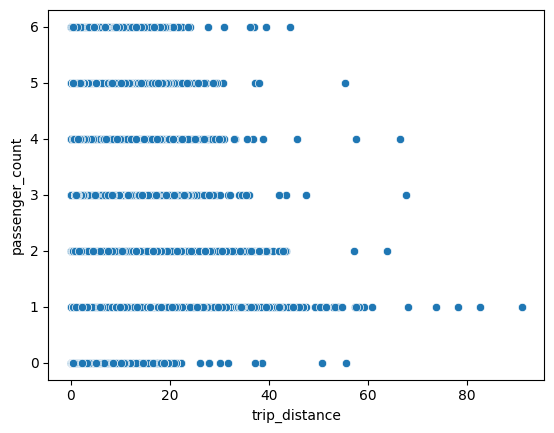

In [1527]:
# Show relationship between fare and number of passengers

sns.scatterplot(df2[['trip_distance','passenger_count']],x='trip_distance',y='passenger_count')
plt.show()

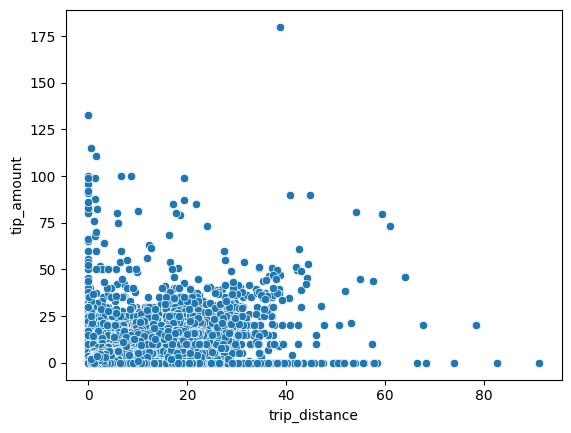

In [1529]:
# Show relationship between tip and trip distance
sns.scatterplot(df2[['trip_distance','tip_amount']],x='trip_distance',y='tip_amount')
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

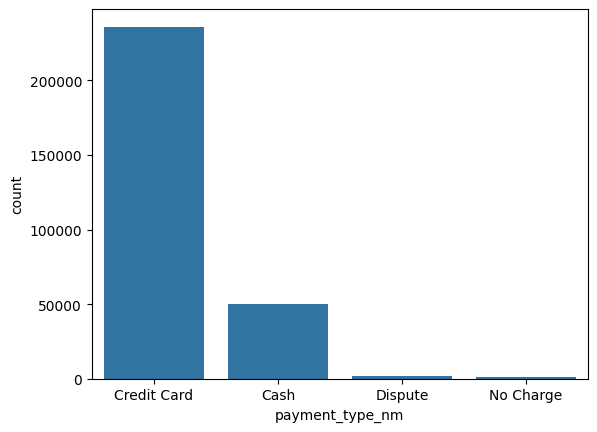

In [1575]:
# Analyse the distribution of different payment types (payment_type).
pymnt_typ_map = {1:'Credit Card',2:'Cash',3: 'No Charge', 4:'Dispute'}
d = df2['payment_type'].value_counts().reset_index()
d['payment_type_nm'] = d['payment_type'].map(pymnt_typ_map)
sns.barplot(d,x='payment_type_nm',y='count')
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [1000]:
# !pip install geopandas
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 2.8 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/16.2 MB 2.6 MB/s eta 0:00:06
   ---- ----------------------------------- 1.8/16.2 MB 3.1 MB/s eta 0:00:05
   ------ --------------------------------- 2.6/16.2 MB 3.0 MB/s eta 0:00:05
   ------- -------------------------------- 3.1/16.2 MB 3.1 MB/s eta 0:00:05
   --------- ------------------------------ 3.9/16.2 MB 3.1 MB/s eta 0:00:05
   ----------- ---------------------------- 4.5/16.2 MB 3.1 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/16.2 MB 3.0 MB/s eta 0:00:04
   -------------- ------------------------- 5.8/16.2 MB 3.0 MB/s eta 0:00:04
   ---------------- ----------------------- 6.6/16.2 MB 3.0 MB/s eta 0:00:04
   ----------------- ---------------------- 7.1/16.2 MB 3.0 MB/s eta 0:00:03
   ------------------- -------------------- 7.9/16.2 MB 3.1 MB/s eta 0:00:03
   ---

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [1533]:
# import geopandas as gpd
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('trip_zones/taxi_zones.shp') # read the .shp file using gpd
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1        0.12        0.00           Newark Airport           1   
1           2        0.43        0.00              Jamaica Bay           2   
2           3        0.08        0.00  Allerton/Pelham Gardens           3   
3           4        0.04        0.00            Alphabet City           4   
4           5        0.09        0.00            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259        0.13        0.00       Woodlawn/Wakefield         259   
259       260        0.13        0.00                 Woodside         260   
260       261        0.03        0.00       World Trade Center         261   
261       262        0.05        0.00           Yorkville East         262   
262       263        0.04        0.00           Yorkville West         263   

           borough                                           geometry  
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
..             ...                                                ...  
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...  
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...  
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...  
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....  
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  

[263 rows x 7 columns]

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

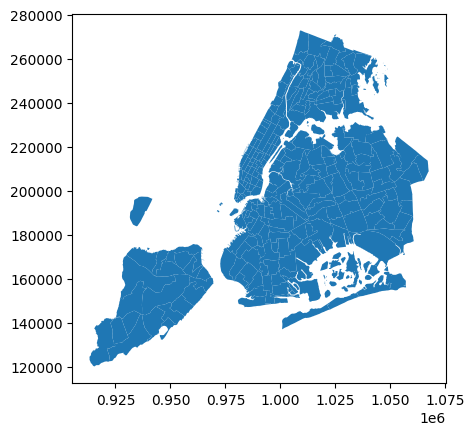

In [1010]:
# print(zones.info())
# zones.plot()
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [1577]:
# Merge zones and trip records using locationID and PULocationID
#df.drop(['OBJECTID_x', 'Shape_Leng_x', 'Shape_Area_x', 'zone_x', 'LocationID_x','borough_x', 'geometry_x', 'OBJECTID_y', 'Shape_Leng_y', 'Shape_Area_y',       'zone_y', 'LocationID_y', 'borough_y', 'geometry_y'],axis=1,inplace=True)

PU_LOC     = [ 'PU_'+f for f in zones_cols]
DO_LOC     = [ 'DO_'+f for f in zones_cols]

df2 = df2.merge(zones,how='inner', left_on=['PULocationID'],right_on=['LocationID'])
zones_cols = list(zones.columns)
df2.rename(columns=dict(zip(zones_cols,PU_LOC)),inplace=True)


df2 = df2.merge(zones,how='inner', left_on=['DOLocationID'],right_on=['LocationID'])
df2.rename(columns=dict(zip(zones_cols,DO_LOC)),inplace=True)
df2


VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              1  2023-01-01 00:51:45   2023-01-01 01:13:54   
1              2  2023-01-01 00:45:56   2023-01-01 00:51:51   
2              2  2023-01-01 00:55:03   2023-01-01 01:00:09   
3              1  2023-01-01 00:42:44   2023-01-01 00:53:41   
4              2  2023-01-01 00:54:28   2023-01-01 01:09:04   
...          ...                  ...                   ...   
295057         2  2023-09-29 23:02:07   2023-09-29 23:06:35   
295058         1  2023-09-29 23:03:30   2023-09-29 23:13:59   
295059         2  2023-09-29 23:22:55   2023-09-29 23:38:19   
295060         2  2023-09-29 23:25:02   2023-09-29 23:37:27   
295061         2  2023-09-29 23:22:19   2023-09-29 23:52:51   

        tpep_trip_duration  passenger_count  trip_distance  RatecodeID  \
0                    22.15             1.00           4.40        1.00   
1                     5.92             1.00           0.88        1.00   
2                     5.10             1.00           0.69        1.00   
3                    10.95             2.00           2.90        1.00   
4                    14.60             3.00           3.66        1.00   
...                    ...              ...            ...         ...   
295057                4.47             5.00           0.48        1.00   
295058               10.48             1.00           2.20        1.00   
295059               15.40             1.00          10.74        1.00   
295060               12.42             2.00           1.73        1.00   
295061               30.53             1.00          10.01        1.00   

       store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
0                       N           137           226             1   
1                       N           236            43             1   
2                       N           142           239             2   
3                       N            79           140             1   
4                       N           231            79             1   
...                   ...           ...           ...           ...   
295057                  N           164           161             1   
295058                  N            43           229             1   
295059                  N           138            54             1   
295060                  N           249           100             1   
295061                  N           132            37             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             21.90   3.50     0.50        5.40          0.00   
1              7.20   1.00     0.50        1.94          0.00   
2              7.20   1.00     0.50        0.00          0.00   
3             14.20   3.50     0.50        2.00          0.00   
4             18.40   1.00     0.50        4.68          0.00   
...             ...    ...      ...         ...           ...   
295057         5.80   1.00     0.50        2.16          0.00   
295058        11.40   3.50     0.50        3.28          0.00   
295059        40.80   6.00     0.50        9.66          0.00   
295060        12.80   1.00     0.50        3.56          0.00   
295061        42.90   1.00     0.50        1.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                        1.00         32.30                  2.50   
1                        1.00         11.64                  0.00   
2                        1.00         12.20                  2.50   
3                        1.00         21.20                  2.50   
4                        1.00         28.08                  2.50   
...                       ...           ...                   ...   
295057                   1.00         12.96                  2.50   
295058                   1.00         19.68                  2.50   
295059                   1.00         59.71                  0.00   
295060                   1.00         

In [1579]:
df2.drop(['DO_OBJECTID','PU_OBJECTID'],inplace=True,axis=1)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [1591]:
# Group data by location and calculate the number of trips
df2.groupby('PULocationID')['PULocationID'].count().sort_values(ascending=False).head(50)



PULocationID
132    15054
237    13944
161    13709
236    12499
162    10618
186    10278
138    10195
230     9843
142     9730
170     8963
163     8543
239     8316
234     8059
48      8054
68      7854
141     7132
164     7045
79      6942
249     6466
107     6314
140     5848
238     5779
263     5660
229     5654
246     4918
100     4907
43      4893
90      4825
113     4098
231     4076
114     3975
262     3966
233     3855
143     3192
137     3187
148     3185
158     2672
144     2532
211     2261
151     2248
50      1921
13      1761
75      1709
261     1642
87      1597
125     1492
166     1271
70      1252
88       871
24       779
Name: PULocationID, dtype: int64

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [1587]:
# Merge trip counts back to the zones GeoDataFrame

_trips     = df2.groupby('DO_LocationID')['DO_LocationID'].value_counts()
_trips_df  = pd.DataFrame(_trips).reset_index()

zones = zones.merge(_trips_df,how='inner',left_on='LocationID',right_on='DO_LocationID')
    

In [1589]:
zones.drop(['DO_LocationID'],axis=1,inplace=True)
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1        0.12        0.00           Newark Airport           1   
1           2        0.43        0.00              Jamaica Bay           2   
2           3        0.08        0.00  Allerton/Pelham Gardens           3   
3           4        0.04        0.00            Alphabet City           4   
4           5        0.09        0.00            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
251       259        0.13        0.00       Woodlawn/Wakefield         259   
252       260        0.13        0.00                 Woodside         260   
253       261        0.03        0.00       World Trade Center         261   
254       262        0.05        0.00           Yorkville East         262   
255       263        0.04        0.00           Yorkville West         263   

           borough                                           geometry  count  
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...    864  
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...      1  
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...     23  
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   1136  
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...      4  
..             ...                                                ...    ...  
251          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...     35  
252         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...    244  
253      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   1473  
254      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   4546  
255      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   5978  

[256 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

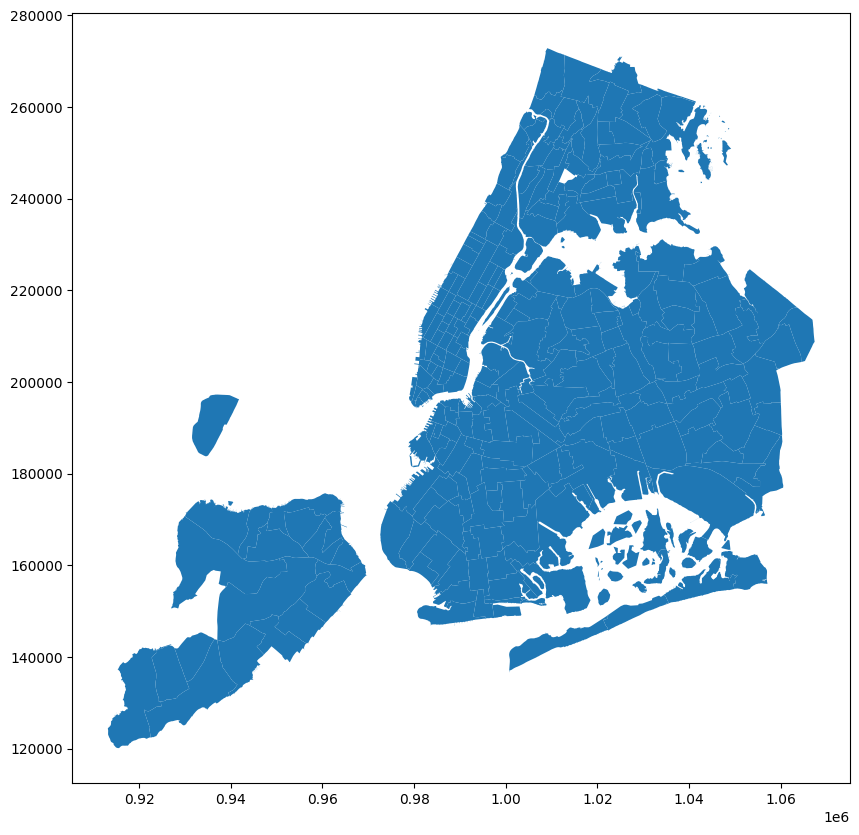

In [1158]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones.plot(ax=ax,markersize=zones['count'])
# Plot the map and display it
plt.show()

In [1170]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values('count',ascending=False)

OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
228       236        0.04        0.00      Upper East Side North         236   
229       237        0.04        0.00      Upper East Side South         237   
154       161        0.04        0.00             Midtown Center         161   
222       230        0.03        0.00  Times Sq/Theatre District         230   
163       170        0.05        0.00                Murray Hill         170   
..        ...         ...         ...                        ...         ...   
43         44        0.24        0.00     Charleston/Tottenville          44   
169       176        0.15        0.00                    Oakwood         176   
1           2        0.43        0.00                Jamaica Bay           2   
29         30        0.09        0.00              Broad Channel          30   
196       204        0.10        0.00          Rossville/Woodrow         204   

           borough                                           geometry  count  
228      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...  13116  
229      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...  12504  
154      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...  11472  
222      Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   9264  
163      Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   8913  
..             ...                                                ...    ...  
43   Staten Island  POLYGON ((925284.273 142075.259, 924921.951 14...      2  
169  Staten Island  POLYGON ((950393.94 148827.195, 950393.983 148...      1  
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...      1  
29          Queens  POLYGON ((1034013.272 163473.152, 1034866.459 ...      1  
196  Staten Island  POLYGON ((927766.539 141772.465, 927864.475 14...      1  

[256 rows x 8 columns]

In [1619]:
zones.groupby(['borough','zone',])['count'].sum().sort_values(ascending=False).head(50)

borough    zone                         
Manhattan  Upper East Side North            13116
           Upper East Side South            12504
           Midtown Center                   11472
           Times Sq/Theatre District         9264
           Murray Hill                       8907
           Lincoln Square East               8637
           Midtown East                      8460
           Upper West Side South             8250
           Lenox Hill West                   7779
           East Chelsea                      7582
           Clinton East                      7515
           Midtown North                     7340
           Union Sq                          6961
           Upper West Side North             6607
           Penn Station/Madison Sq West      6442
           Midtown South                     6433
           Sutton Place/Turtle Bay North     6402
           East Village                      6155
           Lenox Hill East                   6075
         

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [1621]:
# Find routes which have the slowest speeds at different times of the day
df2['trip_speed_MPH'] = df2['trip_distance']/(df2['tpep_trip_duration']/60)

df2.sort_values('trip_speed_MPH')[['trip_speed_MPH','DO_zone','DO_borough']].head(10)


trip_speed_MPH                    DO_zone DO_borough
234628            0.00        Lincoln Square East  Manhattan
26842             0.00              Midtown South  Manhattan
196113            0.00  Williamsburg (South Side)   Brooklyn
196850            0.00    Greenwich Village North  Manhattan
266536            0.00            Jackson Heights     Queens
33090             0.00              Midtown North  Manhattan
65139             0.00               West Village  Manhattan
226957            0.00    Greenwich Village North  Manhattan
33091             0.00               Bloomingdale  Manhattan
266534            0.00            Lenox Hill East  Manhattan

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

    tpep_pickup_hour  Hrly_Trip_Count
18                18            20836
17                17            19904
19                19            18634
16                16            18290
15                15            18265
14                14            17818
13                13            16628
20                20            16588
21                21            16552
12                12            16155
22                22            15359
11                11            14854
10                10            13706
9                  9            12599
23                23            12122
8                  8            11174
0                  0             8325
7                  7             8053
1                  1             5608
6                  6             4094
2                  2             3698
3                  3             2433
5                  5             1716
4                  4             1651


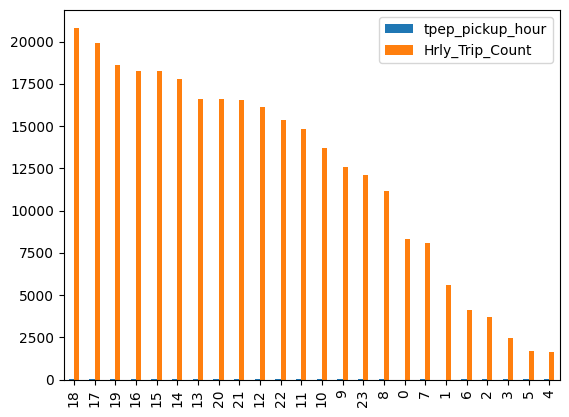

In [1595]:
# Visualise the number of trips per hour and find the busiest hour
hrly_trip = df2.groupby('tpep_pickup_hour')['tpep_pickup_datetime'].count().reset_index().sort_values('tpep_pickup_datetime',ascending=False)
hrly_trip.rename(columns={'tpep_pickup_datetime':'Hrly_Trip_Count'},inplace=True)
hrly_trip.plot.bar()
print(hrly_trip)
plt.xticks(ticks=np.arange(0,24))
plt.show()



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [1597]:
# Scale up the number of trips
num_trip_hr = df2.groupby('tpep_pickup_hour')['tpep_pickup_datetime'].count().reset_index().sort_values('tpep_pickup_datetime',ascending=False)
num_trip_hr.rename(columns={'tpep_pickup_datetime':'Hrly_Trip_Count'},inplace=True)
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
num_trip_hr['Hrly_Trip_Count'] = num_trip_hr['Hrly_Trip_Count']/0.05

print(num_trip_hr)


    tpep_pickup_hour  Hrly_Trip_Count
18                18        416720.00
17                17        398080.00
19                19        372680.00
16                16        365800.00
15                15        365300.00
14                14        356360.00
13                13        332560.00
20                20        331760.00
21                21        331040.00
12                12        323100.00
22                22        307180.00
11                11        297080.00
10                10        274120.00
9                  9        251980.00
23                23        242440.00
8                  8        223480.00
0                  0        166500.00
7                  7        161060.00
1                  1        112160.00
6                  6         81880.00
2                  2         73960.00
3                  3         48660.00
5                  5         34320.00
4                  4         33020.00


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

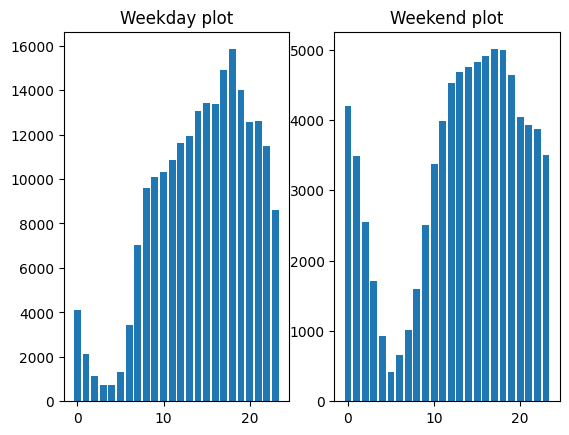

In [1599]:
weekday_cond = df2.tpep_pickup_day_nm.isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
weekday_hr_trip = df2[weekday_cond].groupby('tpep_pickup_hour')['tpep_pickup_datetime'].count().reset_index().sort_values('tpep_pickup_datetime',ascending=False)
weekday_hr_trip.rename(columns={'tpep_pickup_datetime':'Hrly_Trip_Count'},inplace=True)
weekday_hr_trip

weekend_cond = df2.tpep_pickup_day_nm.isin(['Sunday','Saturday'])
weekend_hr_trip = df2[weekend_cond].groupby('tpep_pickup_hour')['tpep_pickup_datetime'].count().reset_index().sort_values('tpep_pickup_datetime',ascending=False)
weekend_hr_trip.rename(columns={'tpep_pickup_datetime':'Hrly_Trip_Count'},inplace=True)
weekend_hr_trip

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.bar(weekday_hr_trip['tpep_pickup_hour'],weekday_hr_trip['Hrly_Trip_Count'])
ax1.set_title('Weekday plot')

ax2.bar(weekend_hr_trip['tpep_pickup_hour'],weekend_hr_trip['Hrly_Trip_Count'])
ax2.set_title('Weekend plot')

plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [1601]:
# Find top 10 pickup and dropoff zones
print('------------Top 10 Pick Up Zones --------------')
print(df2['PU_zone'].value_counts()[:10])

print('------------Top 10 Drop off Up Zones --------------')
print(df2['DO_zone'].value_counts()[:10])



------------Top 10 Pick Up Zones --------------
PU_zone
JFK Airport                     15054
Upper East Side South           13944
Midtown Center                  13709
Upper East Side North           12499
Midtown East                    10618
Penn Station/Madison Sq West    10278
LaGuardia Airport               10195
Times Sq/Theatre District        9843
Lincoln Square East              9730
Murray Hill                      8963
Name: count, dtype: int64
------------Top 10 Drop off Up Zones --------------
DO_zone
Upper East Side North        13116
Upper East Side South        12504
Midtown Center               11472
Times Sq/Theatre District     9264
Murray Hill                   8907
Lincoln Square East           8637
Midtown East                  8460
Upper West Side South         8250
Lenox Hill West               7779
East Chelsea                  7582
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [1625]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
### 11PM to 5PM : top to Pick up ZOnes
print('11PM to 5PM : top to Pick up ZOnes')
print(df2[ (df2.tpep_pickup_datetime.dt.hour > 23) | (df2.tpep_pickup_datetime.dt.hour < 5)  ]['PU_zone'].value_counts()[:10])
print('---------')
print('11PM to 5PM : top to Drop off ZOnes')
print(df2[ (df2.tpep_dropoff_datetime.dt.hour > 23) | (df2.tpep_dropoff_datetime.dt.hour < 5)  ]['DO_zone'].value_counts()[:10])

11PM to 5PM : top to Pick up ZOnes
PU_zone
East Village                    1959
West Village                    1483
Lower East Side                 1321
JFK Airport                     1161
Clinton East                    1143
Greenwich Village South         1022
Times Sq/Theatre District        750
Penn Station/Madison Sq West     673
East Chelsea                     622
Midtown South                    621
Name: count, dtype: int64
---------
11PM to 5PM : top to Drop off ZOnes
DO_zone
East Village       1011
Clinton East        849
Murray Hill         680
Gramercy            654
East Chelsea        648
West Village        614
Lenox Hill West     598
Yorkville West      553
Lower East Side     528
Flatiron            509
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [1629]:
# Filter for night hours (11 PM to 5 AM)
print(df2[ (df2.tpep_dropoff_datetime.dt.hour > 23) | (df2.tpep_dropoff_datetime.dt.hour < 5)  ]['total_amount'].sum())
print(df2[ (df2.tpep_dropoff_datetime.dt.hour > 5 ) & (df2.tpep_dropoff_datetime.dt.hour < 23)  ]['total_amount'].sum())




703873.07
7289718.350000001


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [1631]:
# Analyse the fare per mile per passenger for different passenger counts
df2[~np.isinf(df2['fare_amount_per_dist'])].groupby('passenger_count')['fare_amount_per_dist'].sum()



passenger_count
0.00     36125.00
1.00   2271122.00
2.00    567282.00
3.00    101320.00
4.00     74097.00
5.00     26637.00
6.00     20981.00
Name: fare_amount_per_dist, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [1633]:
# Compare the average fare per mile for different days and for different times of the day
hrly_fare_amt_per_distance = df2[~np.isinf(df2['fare_amount_per_dist'])].groupby(['tpep_pickup_day_nm','tpep_pickup_hour'])['fare_amount_per_dist'].sum()

print(hrly_fare_amt_per_distance)

tpep_pickup_day_nm  tpep_pickup_hour
Friday              0                   9504.00
                    1                   4933.00
                    2                   2693.00
                    3                   3621.00
                    4                   2162.00
                                         ...   
Wednesday           19                 30985.00
                    20                 26309.00
                    21                 30350.00
                    22                 15729.00
                    23                 12517.00
Name: fare_amount_per_dist, Length: 168, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [1635]:
# Compare fare per mile for different vendors
df2[~np.isinf(df2['fare_amount_per_dist'])].groupby(['VendorID'])['fare_amount_per_dist'].sum()


VendorID
1    578603.00
2   2518961.00
Name: fare_amount_per_dist, dtype: float64

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


trip_distance_bin
0-2   2417178.00
2-5    480359.00
>5     199964.00
Name: fare_amount_per_dist, dtype: float64


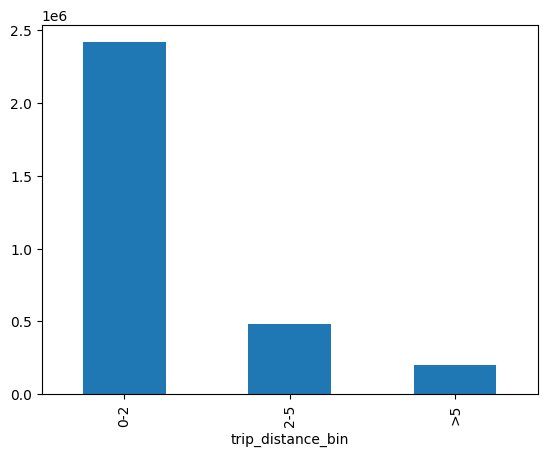

In [1637]:
# Defining distance tiers
dist_tires = df2[~np.isinf(df2['fare_amount_per_dist'])].groupby('trip_distance')['fare_amount_per_dist'].sum().reset_index()
dist_tires['trip_distance_bin'] = pd.cut(dist_tires['trip_distance'],bins=[0,2,5,np.inf],labels=['0-2','2-5','>5'])
print(dist_tires.groupby('trip_distance_bin')['fare_amount_per_dist'].sum())

dist_tires.groupby('trip_distance_bin')['fare_amount_per_dist'].sum().plot.bar()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [1639]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df2['tip_perc'] =100*df2['tip_amount']/df2['total_amount']

print(df2.groupby('passenger_count')['tip_perc'].median())
print(df2.groupby('trip_distance')['tip_perc'].median())
print(df2.groupby('tpep_pickup_hour')['tip_perc'].median())



passenger_count
0.00   16.44
1.00   16.59
2.00   16.54
3.00   16.55
4.00   15.25
5.00   16.67
6.00   16.67
Name: tip_perc, dtype: float64
trip_distance
0.00     0.00
0.01     0.00
0.02     0.00
0.03     0.00
0.04     0.00
         ... 
39.73    0.00
43.99   16.58
44.70    0.00
45.69    0.00
47.56   20.00
Name: tip_perc, Length: 2756, dtype: float64
tpep_pickup_hour
0    16.54
1    16.56
2    16.52
3    16.50
4    13.05
5    12.79
6    13.37
7    16.48
8    16.56
9    16.56
10   16.56
11   16.57
12   16.58
13   16.56
14   16.57
15   16.57
16   16.55
17   16.58
18   16.61
19   16.59
20   16.62
21   16.63
22   16.62
23   16.56
Name: tip_perc, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [1641]:
# See how passenger count varies across hours and days

df2.groupby(['tpep_pickup_day_nm','tpep_pickup_hour'])['passenger_count'].sum()


tpep_pickup_day_nm  tpep_pickup_hour
Friday              0                  1782.00
                    1                  1006.00
                    2                   551.00
                    3                   344.00
                    4                   271.00
                                         ...  
Wednesday           19                 3985.00
                    20                 3620.00
                    21                 3849.00
                    22                 3392.00
                    23                 2226.00
Name: passenger_count, Length: 168, dtype: float64

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [1643]:
# How does passenger count vary across zones
df2.groupby('PU_zone')['passenger_count'].sum().reset_index().sort_values('passenger_count',ascending=False).head(10)


PU_zone  passenger_count
111                   JFK Airport         22517.00
142                Midtown Center         18599.00
209         Upper East Side South         18244.00
208         Upper East Side North         16632.00
202     Times Sq/Theatre District         14442.00
143                  Midtown East         14049.00
164  Penn Station/Madison Sq West         13673.00
120             LaGuardia Airport         13672.00
124           Lincoln Square East         13185.00
151                   Murray Hill         11777.00

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

##### For government to avoid congestion: it would be nice to deploy more number of cars during evening time at this areas. 

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

##### UpperEastSide both North & south have high number of trips.
##### During Evenings across days & months have high demand
##### The other zone which has the highest demand is midtown center with simipar patterns.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.